# Word2Vec for non-NLP tasks
In this exercise you will apply the word2vec algorithm to a playlist dataset. In case you need help with the code, use the previous notebook and documentation

In [236]:
import pandas as pd
import numpy as np
import gensim as gen
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from jupyterthemes import jtplot
jtplot.style()

First lets load the csv named **aotm2011_playlists.csv**. Examine the dataframe to understand you data, how many distinct songs are in the data? how many playlists? etc.

In [2]:
df = pd.read_csv('aotm2011_playlists.csv')
df.head(20)

,artist,category,playlist_id,song,user_id
0,peter murphy,Mixed Genre,89567.0,marlene dietrich's favourite poem,pulmotor
1,the walker brothers,Mixed Genre,89567.0,the sun ain't gonna shine anymore,pulmotor
2,marc almond,Mixed Genre,89567.0,jacky,pulmotor
3,tindersticks,Mixed Genre,89567.0,dying slowly,pulmotor
4,tori amos,Mixed Genre,89567.0,me and a gun,pulmotor
5,suzanne vega,Mixed Genre,89567.0,luka,pulmotor
6,madonna,Mixed Genre,89567.0,spanish eyes,pulmotor
7,the angels of light,Mixed Genre,89567.0,praise your name,pulmotor
8,eurythmics,Mixed Genre,89567.0,sex crime,pulmotor
9,tom waits,Mixed Genre,89567.0,drunk on the moon,pulmotor


In [3]:
df.describe(include=['O'])

,artist,category,song,user_id
count,2001221,1990022,1981227,1990012
unique,187510,43,504985,16196
top,radiohead,Mixed Genre,california,Joe Gillis1
freq,12787,918800,1080,18288


The inconsistency between the [non-unique] count of artists, categories, songs, user_id indicates there are nan values. Let's drop them

In [37]:
df = df.dropna()
df.describe(include=['O'])

,artist,category,song,user_id
count,1979750,1979750,1979750,1979750
unique,187131,43,504417,16196
top,radiohead,Mixed Genre,california,Joe Gillis1
freq,12784,913024,1080,18265


In [38]:
print("There are {} playlists in the dataset".format(df.playlist_id.nunique()))

There are 101260 playlists in the dataset


## Song Similarity
Now we will try to create a song similarity model based on Word2Vec. Think how to compose your sentences, what are your words?

In [87]:
class SentenceGenerator(object):
    def __init__(self, series):
        self.playlists = series.tolist()
        
    def __iter__(self):
        for song in self.playlists:
            yield song


In [79]:
playlists = df.groupby('playlist_id')['song'].apply(list)
playlists[:3]

playlist_id
1.0    [no redemption, philosophy, i got mine, all th...
2.0    [crossover, oh my god, sometimes i rhyme slow,...
3.0    [send in the clowns, i have known love, like a...
Name: song, dtype: object

In [198]:
model = gen.models.Word2Vec(iter=5, size=50, window=50, min_count=20)

In [199]:
sentences = SentenceGenerator(playlists)
print(next(iter(sentences)))

['no redemption', 'philosophy', 'i got mine', 'all the best', 'all wrong', 'together or alone', 'stevland', 'someday, someway', 'no myth', 'camera', 'thumb', 'bit part', 'summer of drugs', 'vincent', "you're driving me crazy", 'i dig you', 'kid fears', 'carolina in my mind', 'i refuse to ever grow up', 'pounding heart', 'sunday morning coming down', 'bubble house', 'sedan/lucky', 'everybody knows this is nowhere', 'brown-eyed girl']


In [200]:
model.build_vocab(sentences)
print("Number of songs in vocabulary: {:,}".format(len(model.wv.vocab)))

Number of songs in vocabulary: 16,843


In [201]:
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

(4779445, 9898750)

Test different songs, how would rate the results? If mediocre or below, why do you think that is?

In [202]:
WORD = 'house of the rising sun'
print("Is the word '{}' in the vocabulary? -> {}\n".format(WORD, WORD in model.wv))
print("{} artists sang this song.\n".format(df[df.song == WORD].artist.nunique()))
print("The top 20 most similar songs to '{}' are:\n {}".format(WORD, [v[0] for v in model.wv.most_similar(WORD, topn=20)]))

Is the word 'house of the rising sun' in the vocabulary? -> True

54 artists sang this song.

The top 20 most similar songs to 'house of the rising sun' are:
 ['break on through', 'born to be wild', 'somebody to love', 'sympathy for the devil', 'hey joe', 'sunshine of your love', 'smoke on the water', 'ring of fire', 'respect', 'time of the season', 'white rabbit', 'born to run', 'fortunate son', "(i can't get no) satisfaction", 'people are strange', 'satisfaction', "for what it's worth", 'roadhouse blues', "don't fear the reaper", 'purple haze']


In [203]:
WORD = 'firestarter'
print("Is the word '{}' in the vocabulary? -> {}\n".format(WORD, WORD in model.wv))
print("{} artists sang this song.\n".format(df[df.song == WORD].artist.nunique()))
print("The top 20 most similar songs to '{}' are:\n {}".format(WORD, [v[0] for v in model.wv.most_similar(WORD, topn=20)]))

Is the word 'firestarter' in the vocabulary? -> True

9 artists sang this song.

The top 20 most similar songs to 'firestarter' are:
 ['unbelievable', 'eyes without a face', 'suck my kiss', "don't stand so close to me", 'scooby snacks', 'hell', 'bye bye bye', 'rusty cage', 'magic dance', 'virtual insanity', 'cradle of love', "block rockin' beats", 'more human than human', 'get down make love', 'i hate myself for loving you', 'the bad touch', 'the beautiful people', 'total eclipse of the heart', 'do you really want to hurt me?', 'battle flag']


In [206]:
WORD = 'no woman no cry'
print("Is the word '{}' in the vocabulary? -> {}\n".format(WORD, WORD in model.wv))
print("{} artists sang this song.\n".format(df[df.song == WORD].artist.nunique()))
print("The top 20 most similar songs to '{}' are:\n {}".format(WORD, [v[0] for v in model.wv.most_similar(WORD, topn=20)]))

Is the word 'no woman no cry' in the vocabulary? -> True

24 artists sang this song.

The top 20 most similar songs to 'no woman no cry' are:
 ["tuesday's gone", 'behind blue eyes', 'november rain', 'closer to fine', 'hurricane', "knockin' on heaven's door", 'over the hills and far away', 'killing me softly', 'beast of burden', 'three little birds', 'last kiss', "you can't always get what you want", "can't help falling in love with you", 'have you ever seen the rain?', 'dust in the wind', 'learning to fly', 'no woman, no cry', 'the boxer', 'woman', 'little wing']


Create another model for artist similarity. Do the results look better than song similarity? Why?

In [208]:
playlists = df.groupby('playlist_id')['artist'].apply(list)
playlists[:3]

playlist_id
1.0    [brian perry, ben folds five, jas mathus and t...
2.0    [epmd, a tribe called quest, nice and smooth, ...
3.0    [krusty the clown, silver apples, madonna, kar...
Name: artist, dtype: object

In [209]:
sentences = SentenceGenerator(playlists)
print(next(iter(sentences)))

['brian perry', 'ben folds five', 'jas mathus and the knockdown society', 'john prine', 'morphine', 'sebadoh', 'gran torino', 'robert gordon', 'michael penn', 'pavement', 'j mascis', 'lemonheads', 'victoria williams', 'don mclean', 'squirrel nut zippers', 'boss hog', 'indigo girls', 'james taylor', "smokin' dave and the premo dopes", 'vroys', 'johnny cash', 'medeski, martin, and wood', 'gran torino', 'neil young', 'van morrison']


In [268]:
model = gen.models.Word2Vec(iter=5, size=5, window=50, min_count=20)

In [269]:
model.build_vocab(sentences)
print("Number of artists in vocabulary: {:,}".format(len(model.wv.vocab)))

Number of artists in vocabulary: 9,554


In [270]:
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

(7817114, 9898750)

In [256]:
WORD = 'bob marley'
print("Is the word '{}' in the vocabulary? -> {}\n".format(WORD, WORD in model.wv))
print("The top 10 most similar artists to '{}' are:\n {}".format(WORD, [v[0] for v in model.wv.most_similar(WORD, topn=10)]))

Is the word 'bob marley' in the vocabulary? -> True

The top 10 most similar artists to 'bob marley' are:
 ['bob marley & the wailers', 'sublime', 'marvin gaye', 'ben harper', 'jimmy cliff', 'bob marley and the wailers', 'jimi hendrix', 'peter tosh', 'dave matthews', '311']


In [258]:
WORD = 'leonard cohen'
print("Is the word '{}' in the vocabulary? -> {}\n".format(WORD, WORD in model.wv))
print("The top 10 most similar artists to '{}' are:\n {}".format(WORD, [v[0] for v in model.wv.most_similar(WORD, topn=10)]))

Is the word 'leonard cohen' in the vocabulary? -> True

The top 10 most similar artists to 'leonard cohen' are:
 ['tom waits', 'nick cave and the bad seeds', 'lou reed', 'nico', 'nick cave', 'tim buckley', 'skip james', 'bonnie "prince" billy', 'nina simone', 'john cale']


In [259]:
WORD = 'amy winehouse'
print("Is the word '{}' in the vocabulary? -> {}\n".format(WORD, WORD in model.wv))
print("The top 10 most similar artists to '{}' are:\n {}".format(WORD, [v[0] for v in model.wv.most_similar(WORD, topn=10)]))

Is the word 'amy winehouse' in the vocabulary? -> True

The top 10 most similar artists to 'amy winehouse' are:
 ['lily allen', 'nellie mckay', 'scissor sisters', 'gnarls barkley', 'vampire weekend', 'joss stone', 'neko case', 'the magic numbers', 'the detroit cobras', 'jenny lewis with the watson twins']


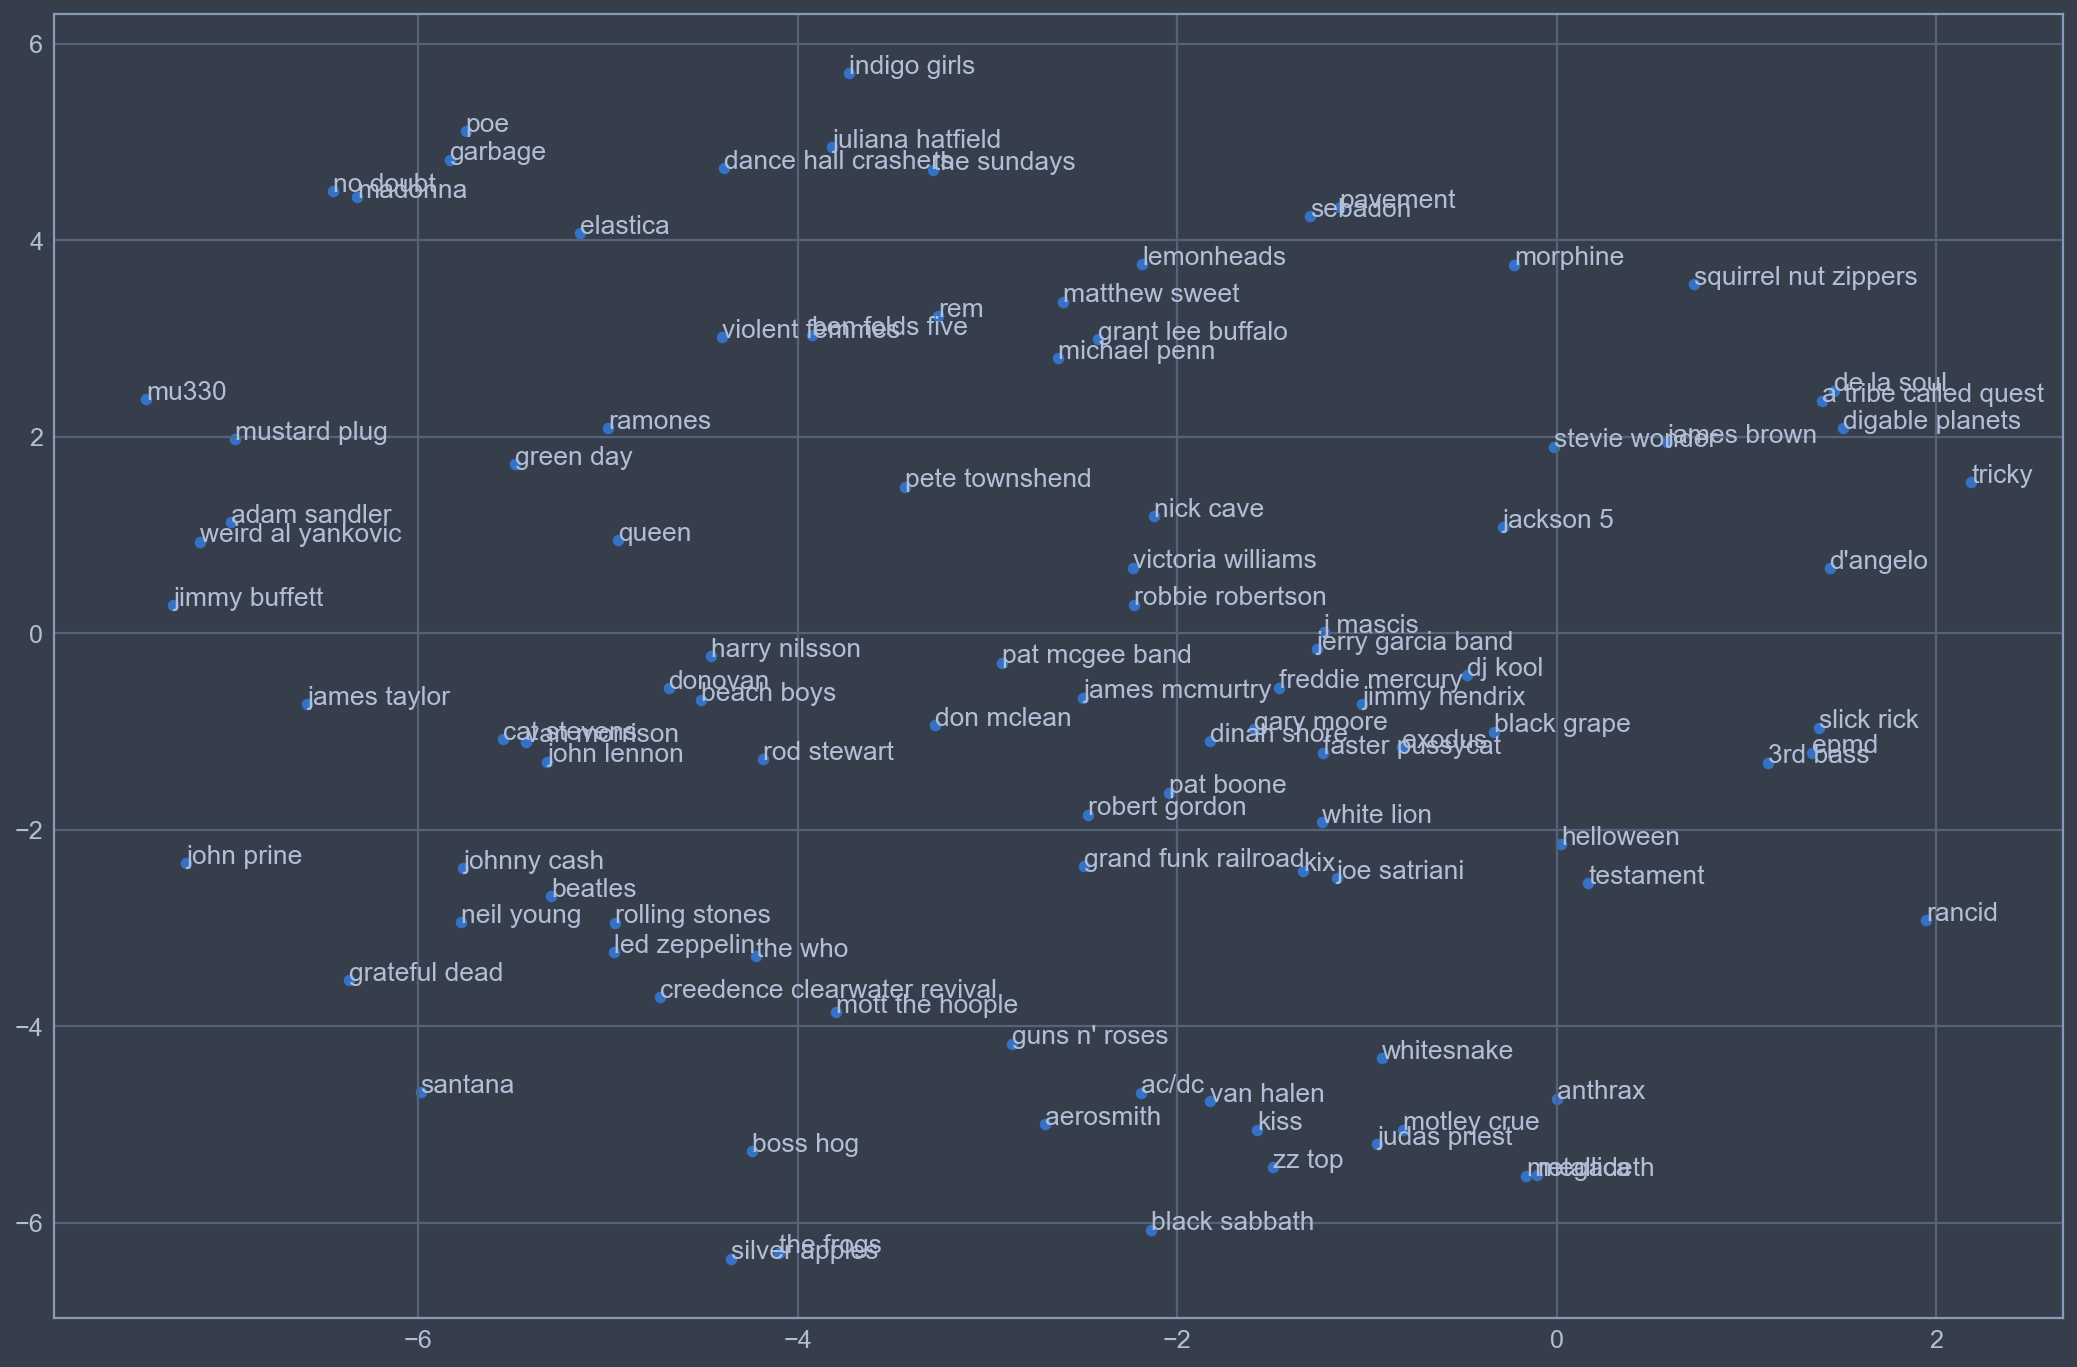

In [265]:
from sklearn.manifold import TSNE

labels = list(model.wv.vocab.keys())[:100]
X = np.stack([model.wv[word] for word in labels]) 
tsne = TSNE(n_components=2, random_state=12)
X_2d = tsne.fit_transform(X)
x = [x[0] for x in X_2d]
y = [x[1] for x in X_2d]
plt.figure(figsize=(18,12))
plt.scatter(x, y)
ax = plt.gca()
for i,label in enumerate(labels):
    ax.annotate(label, (x[i],y[i]))
plt.show()

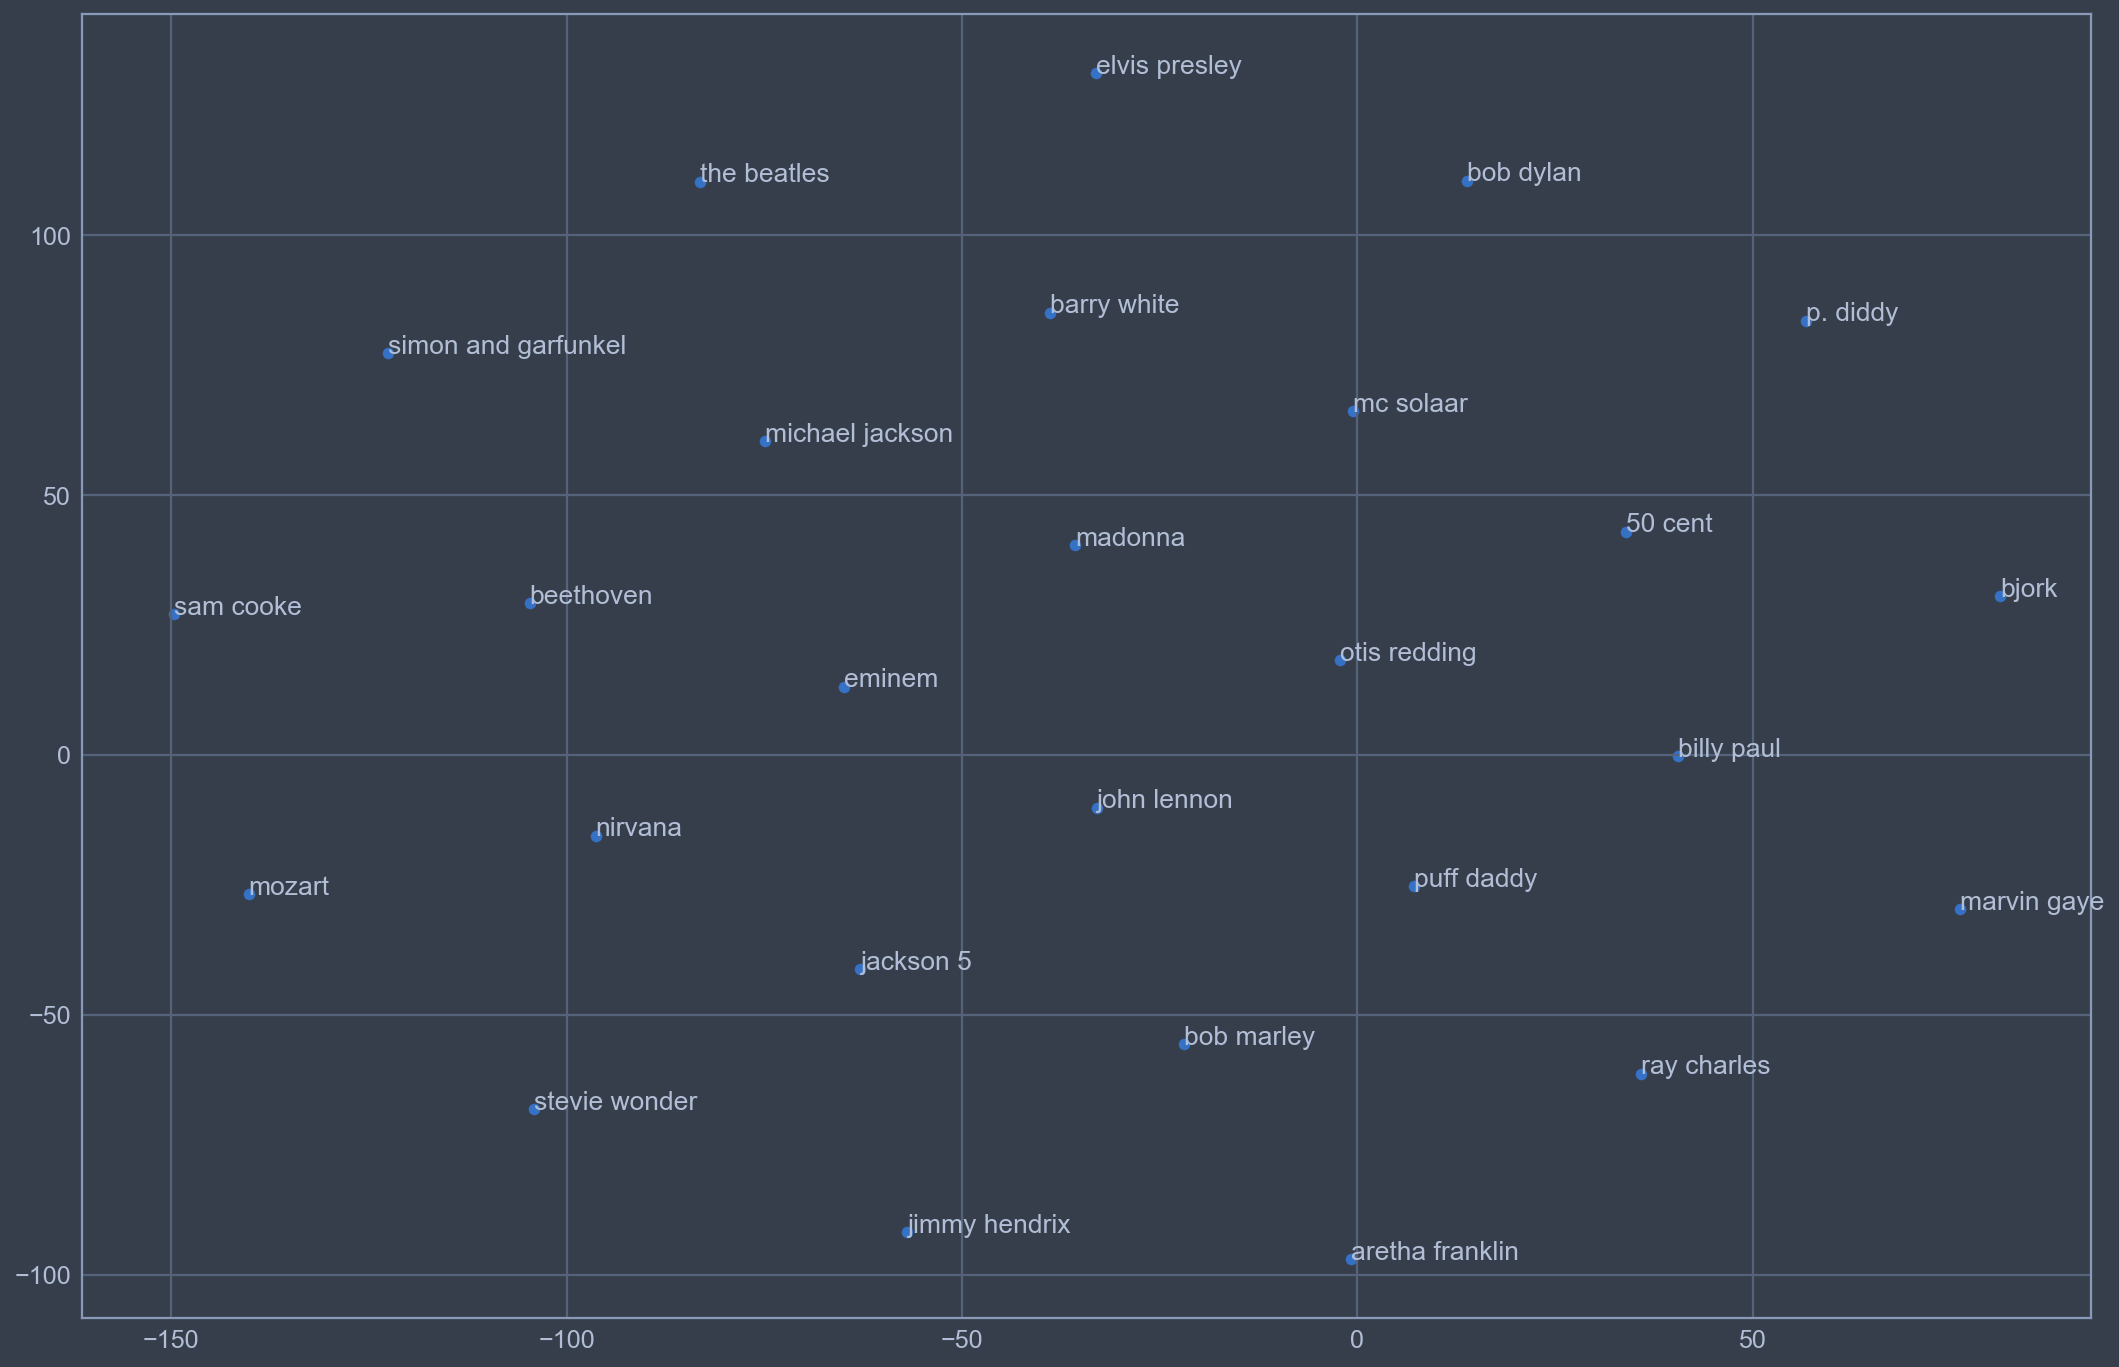

In [271]:
labels = ['bob marley','the beatles', 'jimmy hendrix', 'mc solaar', 
          'stevie wonder', 'billy paul', 'barry white', 'michael jackson',
         'madonna', 'simon and garfunkel', 'nirvana', 'eminem', '50 cent',
         'puff daddy', 'p. diddy', 'beethoven', 'mozart', 'aretha franklin', 
          'ray charles', 'elvis presley', 'sam cooke', 'john lennon', 
          'marvin gaye', 'bob dylan', 'otis redding', 'bjork', 'jackson 5'] #you can add/change as many words as you like

X = np.stack([model.wv[word] for word in labels]) 
tsne = TSNE(n_components=2, random_state=12)
X_2d = tsne.fit_transform(X)
x = [x[0] for x in X_2d]
y = [x[1] for x in X_2d]
plt.figure(figsize=(18,12))
plt.scatter(x, y)
ax = plt.gca()
for i,label in enumerate(labels):
    ax.annotate(label, (x[i],y[i]))
plt.show()